In [1]:
import numpy as np
import pandas as pd
#import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from fastai.structured import *
import matplotlib.pyplot as plt
import os
import glob

from numpy import nan as Nan

In [2]:
path = r'C:\Users\Marcin\PycharmProjects\inz\venv'
all_files = glob.glob(path + "/*.csv")

In [3]:
li = []
for filename in all_files:
    df = pd.read_csv(filename, sep=',', header=1, low_memory=False) #read csv
    li.append(df)

In [7]:
crypto_data = pd.concat(li, axis=0, ignore_index=True)

In [8]:
crypto_data = crypto_data.drop(columns=['Unix Timestamp'])

In [9]:
crypto_data.dtypes

Date       object
Symbol     object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [10]:
crypto_data['Date'] = pd.to_datetime(crypto_data['Date'])
#crypto_data['Date'] = pd.to_numeric(crypto_data['Date'])

C:\Users\Marcin\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


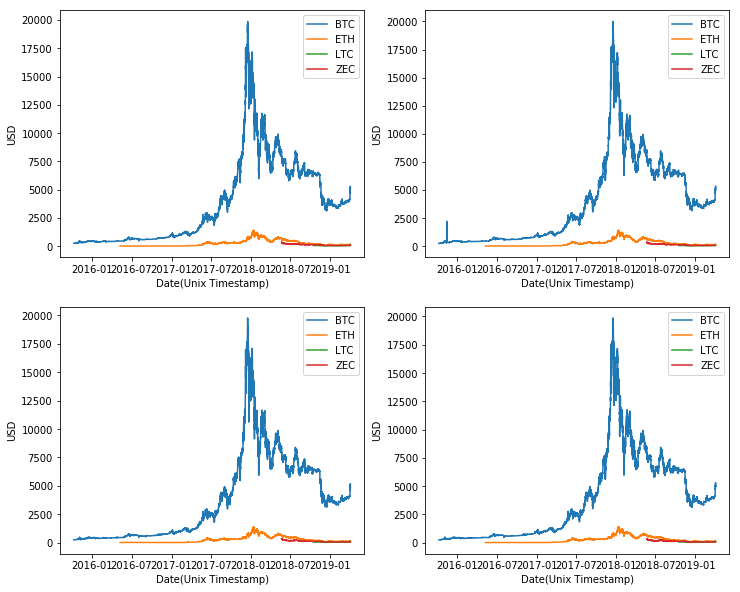

In [11]:
#btc - 30563
#eth - 55991
#ltc - 60059
#zec - 67655

fig = plt.figure(1, figsize=(12,10))
for i in range(2, 6):
    tmp_fig = fig.add_subplot(2,2,i-1)
    plt.plot(crypto_data.iloc[:30563, 0], crypto_data.iloc[:30563, i], label="BTC") #Open
    plt.plot(crypto_data.iloc[30564:55991, 0], crypto_data.iloc[30564:55991, i], label="ETH")
    plt.plot(crypto_data.iloc[55992:60059, 0], crypto_data.iloc[55992:60059, i], label="LTC")
    plt.plot(crypto_data.iloc[60060:67655, 0], crypto_data.iloc[60060:67655, i], label="ZEC")
    plt.legend()
    plt.ylabel('USD')
    plt.xlabel('Date(Unix Timestamp)')

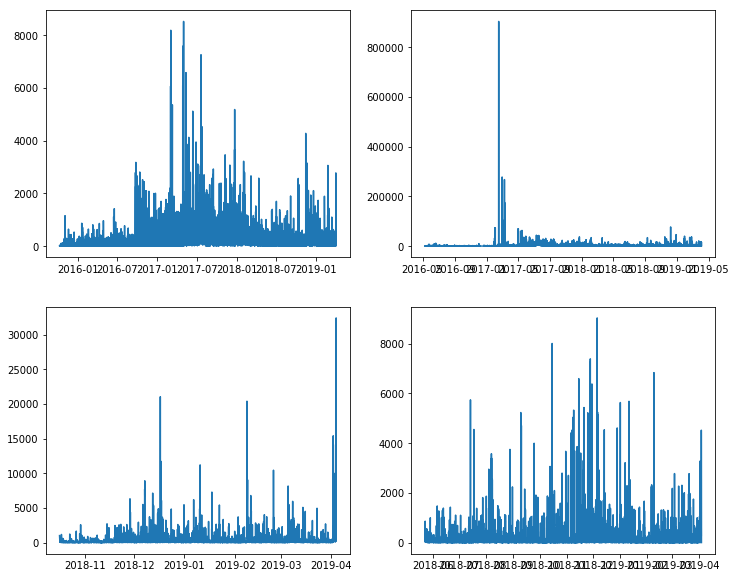

In [12]:
fig = plt.figure(1, figsize=(12,10))

tmp_fig = fig.add_subplot(2,2,1)
plt.plot(crypto_data.iloc[:30563, 0], crypto_data.iloc[:30563, 6], label="BTC") #Open
tmp_fig = fig.add_subplot(2,2,2)
plt.plot(crypto_data.iloc[30564:55991, 0], crypto_data.iloc[30564:55991, 6], label="ETH")
tmp_fig = fig.add_subplot(2,2,3)
plt.plot(crypto_data.iloc[55992:60059, 0], crypto_data.iloc[55992:60059, 6], label="LTC")
tmp_fig = fig.add_subplot(2,2,4)
plt.plot(crypto_data.iloc[60060:67655, 0], crypto_data.iloc[60060:67655, 6], label="ZEC")

In [13]:
crypto_data.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2019-04-04 00:00:00,BTCUSD,4976.94,4977.20,4939.53,4940.89,17.553291
1,2019-04-03 23:00:00,BTCUSD,5113.50,5113.50,4800.00,4976.94,2331.356847
2,2019-04-03 22:00:00,BTCUSD,5188.41,5266.70,4975.00,5113.50,1632.587373
3,2019-04-03 21:00:00,BTCUSD,5293.76,5346.68,5180.04,5188.41,350.507383
4,2019-04-03 20:00:00,BTCUSD,5140.62,5319.81,5140.62,5293.76,1005.936609


# Creating new df with 841 columns to put it do model, also named it properly 

In [14]:
tmp_df= crypto_data.iloc[0:2,2:7]
tmp_df

,Open,High,Low,Close,Volume
0,4976.94,4977.2,4939.53,4940.89,17.553291
1,5113.50,5113.5,4800.00,4976.94,2331.356847


In [15]:
crypto_data.head()


,Date,Symbol,Open,High,Low,Close,Volume
0,2019-04-04 00:00:00,BTCUSD,4976.94,4977.20,4939.53,4940.89,17.553291
1,2019-04-03 23:00:00,BTCUSD,5113.50,5113.50,4800.00,4976.94,2331.356847
2,2019-04-03 22:00:00,BTCUSD,5188.41,5266.70,4975.00,5113.50,1632.587373
3,2019-04-03 21:00:00,BTCUSD,5293.76,5346.68,5180.04,5188.41,350.507383
4,2019-04-03 20:00:00,BTCUSD,5140.62,5319.81,5140.62,5293.76,1005.936609


In [16]:
df_model = {}
df_model = pd.DataFrame(data=df_model)
df_model
colname=['Open', 'High', 'Low', 'Close', 'Volume']
for i in range(1, 8):
    for j in range(1, 25):
        for k in colname:
            a = ['D' + str(i) + "_H" + str(j)  + "_" + k] 
            type(a)
            #print(a)
            df_model[a[0]] = 0
            
df_model['Open_X'] = 0            

#df_model = df_model.insert(0 ,crypto_data.iloc[0, 2:7])



df_model = df_model.append({'Open_X': 1}, ignore_index=True)
df_model

,D1_H1_Open,D1_H1_High,D1_H1_Low,D1_H1_Close,D1_H1_Volume,D1_H2_Open,D1_H2_High,D1_H2_Low,D1_H2_Close,D1_H2_Volume,...,D7_H23_High,D7_H23_Low,D7_H23_Close,D7_H23_Volume,D7_H24_Open,D7_H24_High,D7_H24_Low,D7_H24_Close,D7_H24_Volume,Open_X
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [17]:
data_list = []
for i in range(0, 30563):
    for j in range(2, 7):
        data_list.append(crypto_data.iloc[i][j])
        
data_list

[4976.94,
 4977.2,
 4939.53,
 4940.89,
 17.5532911705,
 5113.5,
 5113.5,
 4800.0,
 4976.94,
 2331.3568471708,
 5188.41,
 5266.7,
 4975.0,
 5113.5,
 1632.5873728768,
 5293.76,
 5346.68,
 5180.04,
 5188.41,
 350.5073825624,
 5140.62,
 5319.81,
 5140.62,
 5293.76,
 1005.9366087011999,
 5140.38,
 5176.3,
 5128.49,
 5140.62,
 152.4462119358,
 5128.64,
 5188.92,
 5124.7,
 5140.38,
 165.6823497242,
 5123.26,
 5185.57,
 5076.6,
 5128.64,
 456.0491327021,
 5012.75,
 5147.07,
 5012.74,
 5123.26,
 1519.1022540285999,
 5012.76,
 5029.37,
 5000.0,
 5012.75,
 104.7333992011,
 5038.59,
 5042.81,
 4998.22,
 5012.76,
 153.085202673,
 5008.68,
 5047.87,
 5000.99,
 5038.59,
 155.9030115071,
 4968.02,
 5029.9,
 4968.02,
 5008.68,
 202.4336783537,
 4953.51,
 4986.69,
 4947.82,
 4968.02,
 56.949998078,
 4975.0,
 4981.89,
 4946.77,
 4953.51,
 182.3226885866,
 4957.82,
 4975.0,
 4929.67,
 4975.0,
 175.355647612,
 4962.68,
 4970.61,
 4925.26,
 4957.82,
 46.76053916,
 4974.55,
 4991.48,
 4949.03,
 4962.68,
 49.

In [20]:
shift = 24 * 5 #numb of hour * numb of column
first_value = 0
last_value = 841
len(li)
tmp_list = data_list.copy()

row = 0

while True:
    tmp_list = data_list[first_value:last_value]
    #tmp_list
    #break
    for column_index, element in enumerate(tmp_list):
        df_model.loc[row][df_model.columns[column_index]] = element
        #if column_index == last_value:
            #break
    row += 1
    first_value = first_value + shift
    last_value = last_value + shift
    
    df_model = df_model.append(pd.DataFrame({df_model.columns[0]:[Nan]}), ignore_index=True, sort = False)
    
    if (first_value > 30563)  or (last_value > 30563):
        df_model.drop(df_model.tail(1).index, inplace=True)
        break
    

df_model

,D1_H1_Open,D1_H1_High,D1_H1_Low,D1_H1_Close,D1_H1_Volume,D1_H2_Open,D1_H2_High,D1_H2_Low,D1_H2_Close,D1_H2_Volume,...,D7_H23_High,D7_H23_Low,D7_H23_Close,D7_H23_Volume,D7_H24_Open,D7_H24_High,D7_H24_Low,D7_H24_Close,D7_H24_Volume,Open_X
0,4976.940000,4977.20,4939.530000,4940.89,17.553291,5113.50,5113.50,4800.00,4976.940000,2331.356847,...,4017.940,4011.70,4017.46,69.933295,4015.48,4016.82,4005.85,4015.57,35.161869,4027.350000
1,4903.800000,4997.66,4896.670000,4978.97,531.882947,4829.42,4946.60,4812.84,4903.800000,696.056079,...,3976.570,3960.43,3976.01,115.159368,3931.99,3978.98,3930.50,3966.90,184.087459,3919.990000
2,4136.540000,4160.00,4131.250000,4147.39,158.624792,4137.01,4144.68,4135.03,4136.540000,40.717529,...,3919.255,3913.73,3918.15,106.480558,3907.65,3915.63,3907.65,3913.73,82.937079,3908.700000
3,4095.010000,4120.93,4052.490000,4112.45,234.065876,4092.00,4096.07,4091.99,4095.010000,36.263482,...,3978.580,3972.52,3972.82,133.038338,3963.93,3974.08,3962.93,3974.07,47.245538,3971.530000
4,4094.030000,4102.91,4086.900000,4086.91,21.336038,4082.13,4094.03,4082.13,4094.030000,19.953838,...,3974.480,3960.00,3962.50,132.169220,3975.22,3977.31,3970.57,3973.00,14.462547,3982.450000
5,4082.720000,4082.72,4082.720000,4082.72,0.000000,4085.00,4085.00,4082.72,4082.720000,0.000000,...,3996.000,3982.50,3996.00,22.902281,3986.67,3990.11,3984.00,3990.00,4.409101,3986.670000
6,4012.810000,4030.80,4012.570000,4014.55,87.144193,4010.34,4013.73,4009.64,4012.810000,17.938906,...,3984.900,3976.42,3982.66,37.761107,3980.40,3980.89,3975.21,3976.43,29.735762,3975.010000
7,4027.350000,4027.35,4005.480000,4015.48,75.611233,4011.47,4034.00,4011.47,4027.350000,214.250062,...,4032.540,4025.97,4030.87,57.237842,4039.05,4040.88,4017.99,4025.97,37.703032,4032.000000
8,3919.990000,3932.00,3914.950000,3931.99,113.208362,3914.65,3919.99,3910.82,3919.990000,29.840841,...,3979.200,3972.39,3973.07,63.572872,3965.30,3980.81,3965.30,3972.39,82.546311,4001.300000
9,3908.700000,3916.24,3906.110000,3907.65,67.323452,3905.00,4034.13,3902.11,3908.700000,567.489488,...,3980.420,3972.41,3975.75,72.966349,3981.57,3984.50,3976.52,3976.53,65.216914,3969.990000


In [318]:
train_cats(df_model)

In [319]:
df_model.dtypes

D1_H1_Open       float64
D1_H1_High       float64
D1_H1_Low        float64
D1_H1_Close      float64
D1_H1_Volume     float64
D1_H2_Open       float64
D1_H2_High       float64
D1_H2_Low        float64
D1_H2_Close      float64
D1_H2_Volume     float64
D1_H3_Open       float64
D1_H3_High       float64
D1_H3_Low        float64
D1_H3_Close      float64
D1_H3_Volume     float64
D1_H4_Open       float64
D1_H4_High       float64
D1_H4_Low        float64
D1_H4_Close      float64
D1_H4_Volume     float64
D1_H5_Open       float64
D1_H5_High       float64
D1_H5_Low        float64
D1_H5_Close      float64
D1_H5_Volume     float64
D1_H6_Open       float64
D1_H6_High       float64
D1_H6_Low        float64
D1_H6_Close      float64
D1_H6_Volume     float64
                  ...   
D7_H19_High      float64
D7_H19_Low       float64
D7_H19_Close     float64
D7_H19_Volume    float64
D7_H20_Open      float64
D7_H20_High      float64
D7_H20_Low       float64
D7_H20_Close     float64
D7_H20_Volume    float64


In [310]:
df_model.head()

,D1_H1_Open,D1_H1_High,D1_H1_Low,D1_H1_Close,D1_H1_Volume,D1_H2_Open,D1_H2_High,D1_H2_Low,D1_H2_Close,D1_H2_Volume,...,D7_H23_High,D7_H23_Low,D7_H23_Close,D7_H23_Volume,D7_H24_Open,D7_H24_High,D7_H24_Low,D7_H24_Close,D7_H24_Volume,Open_X
0,4976.94,4977.20,4939.53,4940.89,17.553291,5113.50,5113.50,4800.00,4976.94,2331.356847,...,4017.940,4011.70,4017.46,69.933295,4015.48,4016.82,4005.85,4015.57,35.161869,4027.35
1,4903.80,4997.66,4896.67,4978.97,531.882947,4829.42,4946.60,4812.84,4903.80,696.056079,...,3976.570,3960.43,3976.01,115.159368,3931.99,3978.98,3930.50,3966.90,184.087459,3919.99
2,4136.54,4160.00,4131.25,4147.39,158.624792,4137.01,4144.68,4135.03,4136.54,40.717529,...,3919.255,3913.73,3918.15,106.480558,3907.65,3915.63,3907.65,3913.73,82.937079,3908.70
3,4095.01,4120.93,4052.49,4112.45,234.065876,4092.00,4096.07,4091.99,4095.01,36.263482,...,3978.580,3972.52,3972.82,133.038338,3963.93,3974.08,3962.93,3974.07,47.245538,3971.53
4,4094.03,4102.91,4086.90,4086.91,21.336038,4082.13,4094.03,4082.13,4094.03,19.953838,...,3974.480,3960.00,3962.50,132.169220,3975.22,3977.31,3970.57,3973.00,14.462547,3982.45


In [311]:

df, y, nas = proc_df(df_model, 'Open_X')
x_train2, x_test2, y_train2, y_test2 = train_test_split(df, y, test_size=0.2, random_state=42)
regr1 = RandomForestRegressor(max_depth=3, n_estimators=100)
regr1.fit(x_train2, y_train2)
print(regr1.feature_importances_)
regr1.score(x_train2, y_train2)

[0.      0.      0.00009 0.      0.      0.      0.00008 0.      0.      0.      0.      0.      0.00011
 0.      0.      0.00003 0.      0.      0.00005 0.      0.      0.00007 0.      0.      0.00006 0.
 0.      0.      0.      0.00005 0.      0.      0.00005 0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.00011 0.00007 0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.0001  0.00003 0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.00009
 0.      0.      0.      0.00007 0.      0.      0.00007 0.      0.      0.      0.00009 0.0093  0.
 0.00011 0.      0.00009 0.      0.      0.00018 0.      0.00007 0.      0.00011 0.0001  0.00012 0.
 0.      0.00012 0.00013 0.      0.00946 0.      0.      0.      0.      0.      0.      0

0.9950458240477373

In [323]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df, y)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9990534256545671

In [19]:
os.makedirs('tmp', exist_ok=True)
crypto_data.to_feather('tmp/crypto_data') #saving file 

In [312]:
df, y, nas = proc_df(df_model, 'Open_X')

In [313]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df, y, test_size=0.2, random_state=42)

In [314]:
y_test1

array([3946.56, 3975.01, 6455.44, 3692.35, 6407.43, 8400.  , 6485.  , 3265.44, 3969.99, 7014.55, 6720.18,
       7413.7 , 7602.14, 6597.94, 3533.49, 6413.23, 6498.37, 3862.12, 6433.42, 3789.61, 3771.43, 3842.  ,
       3691.92, 3687.  , 6580.76, 6313.83, 6185.27, 3965.45, 3820.26, 3839.06, 6692.  , 8192.21, 3970.  ,
       3812.45, 8160.  , 3917.49, 5572.71, 6243.21, 3412.1 , 3647.21, 6465.97, 3394.5 , 3558.19, 6577.78,
       3851.15, 4223.69, 3608.  , 6621.37, 3626.7 , 6545.49])

In [315]:
regr = RandomForestRegressor(max_depth=3, n_estimators=100)
regr.fit(x_train1, y_train1)
print(regr.feature_importances_)
print(regr.predict([[0, 0, 0, 0, 0, 0, 0]]))
print_score(regr)

[0.      0.      0.00005 0.      0.      0.      0.      0.      0.      0.      0.00005 0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.00008 0.      0.      0.      0.      0.
 0.      0.      0.00005 0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.00006 0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.0001  0.      0.      0.      0.      0.      0.      0.      0.      0.00007
 0.      0.      0.      0.      0.      0.      0.      0.00005 0.00003 0.      0.      0.      0.
 0.0001  0.      0.      0.      0.      0.00007 0.      0.      0.      0.      0.      0.      0.
 0.00009 0.      0.00009 0.      0.      0.      0.      0.      0.00002 0.00928 0.      0.    

ValueError: Number of features of the model must match the input. Model n_features is 840 and input n_features is 7 

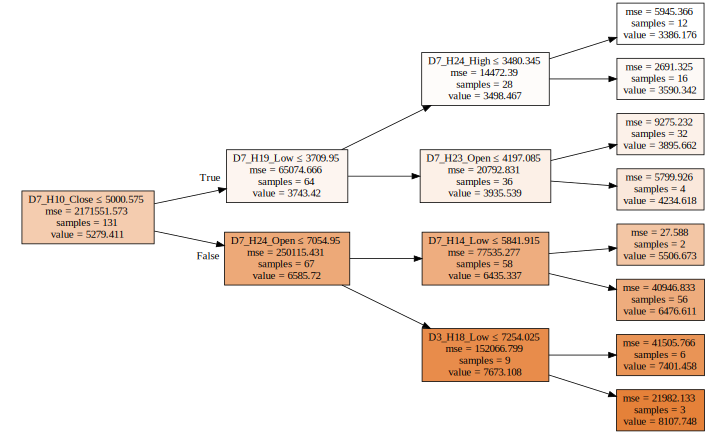

In [316]:
draw_tree(regr.estimators_[0], x_train1, precision=3)

In [25]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 1000  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(crypto_data, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((66656, 7), (66656,), (1000, 7))

In [26]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [27]:
df_trn, y_trn, nas = proc_df(crypto_data, 'Open', subset=5000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [28]:
df_trn

,Date,Symbol,High,Low,Close,Volume,coins_mean
3,1554325200000000000,0,5346.68,5180.04,5188.41,350.507383,5263.360
9,1554303600000000000,0,5029.37,5000.00,5012.75,104.733399,5014.685
14,1554285600000000000,0,4981.89,4946.77,4953.51,182.322689,4964.330
24,1554249600000000000,0,4997.66,4896.67,4978.97,531.882947,4947.165
30,1554228000000000000,0,4739.00,4725.58,4738.99,119.955081,4732.290
32,1554220800000000000,0,4749.98,4719.27,4736.80,280.194980,4734.625
34,1554213600000000000,0,4803.00,4670.00,4748.28,535.827868,4736.500
42,1554184800000000000,0,4772.23,4649.49,4719.65,950.230731,4710.860
54,1554141600000000000,0,4135.00,4127.92,4133.04,48.919953,4131.460
65,1554102000000000000,0,4130.00,4118.39,4122.00,32.345557,4124.195


In [29]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 119 ms
[17.758653028830768, 5.621133635041957, 0.9999670009749642, 0.9820640303123337]


In [30]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[375.2977540665688, 55.46887335741082, 0.9852621885654652, -0.7465287163926977]


In [31]:
??RandomForestRegressor

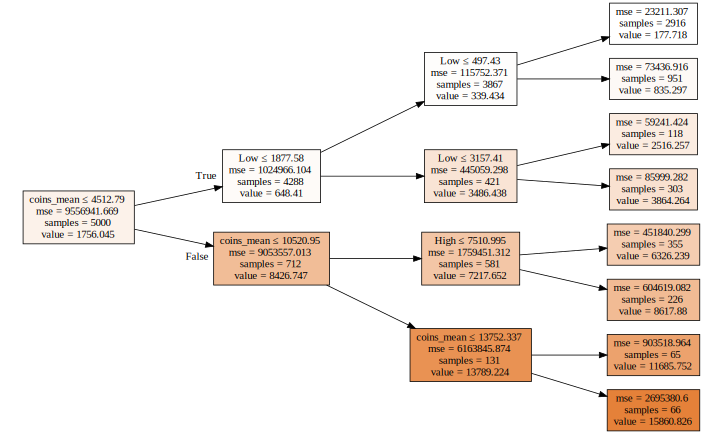

In [32]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [33]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[14.610498788026097, 6.343169086106527, 0.9999776637043284, 0.9771603408987153, 0.9998433027418674]


In [34]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[14.549700061860845, 6.113490392474253, 0.9999778492137732, 0.9787843907001146]
